<a href="https://colab.research.google.com/github/Akshitwadhwa/Stock-modelling/blob/main/stock_eda_prj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.This is the colab notebook containing the information and extraction of various stocks using Y-finance and visualize the different aspects of those stocks.

## So to accomplish that we are going to be using the Y-Finance library which is available on google collab

## what is a optimized portfolio , an optimized porfolio is the one which has the maximum return and minimizes the risk/volatility
-- what we are going to do here is the same thing where we are going to select 5 random stocks from the nifty50 an work on it by calculating the expected return and the seeing if we get the best returns.

In [ ]:
# importing the libraries
import pandas as pd
import numpy as np
import yfinance as yf

In [ ]:
import matplotlib.pyplot as plt
# this is package which is used to make graphs


In [ ]:
nifty50_stocks = [
    "RELIANCE.NS", "TCS.NS", "INFY.NS", "HDFCBANK.NS", "ICICIBANK.NS",
    "HINDUNILVR.NS", "SBIN.NS", "BAJFINANCE.NS", "HDFC.NS", "BHARTIARTL.NS",
    "KOTAKBANK.NS", "ITC.NS", "LT.NS", "ASIANPAINT.NS", "AXISBANK.NS",
    "HCLTECH.NS", "TITAN.NS", "MARUTI.NS", "ULTRACEMCO.NS", "WIPRO.NS"]

    # what this will do is it is creating a list of the stocks on the nifty that


In [ ]:
stock_data = []

# this is the stock data we had given it before... it is being called in the data in the form of a dataframe

for stock in nifty50_stocks:
    try:
        ticker = yf.Ticker(stock)
        info = yf.Ticker(stock).info


        hist = ticker.history(period="6mo")["Close"]

        # this parameters we are going to use in the stock selection.
        stock_data.append({
            "Symbol": stock,
            "PE Ratio": info.get("trailingPE", None),
            "Market Cap": info.get("marketCap", None),
            "Avg Volume": info.get("averageVolume", None)
            })


    except Exception as e:
        print(f"Error fetching data for {stock}: {e}")

ERROR:yfinance:$HDFC.NS: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")


## what does the above mentioned terminologies mean/ the parameters we have selcted.
**Here pe ratio stand for the "Price to earnings ratio" which shows us the cost/ how expensive a certain stock is based upon the earnings it has produced per share of the stock bought**

**Market cap is the current share price of a single stock multiped by the no of shares liquid to the public**

**Average Volume is the total no of shares being traded in a single day**



In [ ]:
df = pd.DataFrame(stock_data)

In [ ]:
# these are the specifications we are taking

pe_min, pe_max = 10, 30
market_cap_min = 50000000000 # Minimum 5000 Cr market cap has been taken into accomodation
volume_min = 1000000  # Minimum 10L average volume



In [ ]:

filtered_df = df[
    (df["PE Ratio"].between(pe_min, pe_max, inclusive="both")) &
    (df["Market Cap"] >= market_cap_min) &
    (df["Avg Volume"] >= volume_min)
]

# Select random stocks from filtered ones
num_stocks = 5
selected_stocks = filtered_df.sample(min(num_stocks, len(filtered_df)))

# Display results
print("Filtered & Randomly Selected Stocks:")
print(selected_stocks)

Filtered & Randomly Selected Stocks:
          Symbol   PE Ratio    Market Cap  Avg Volume
3    HDFCBANK.NS  20.453375  1.399800e+13  10938416.0
19      WIPRO.NS  22.183277  2.747398e+12  12313013.0
0    RELIANCE.NS  24.960884  1.727073e+13  11931494.0
11        ITC.NS  25.481665  5.130781e+12  15016586.0
4   ICICIBANK.NS  19.644160  9.593240e+12  10559910.0


In [ ]:
# we get these five stocks based on the random selection
# let us see the mean and the values of the stocks
 # of the top two
Infosys = yf.Ticker("INFY.NS")
Axis = yf.Ticker("AXISBANK.NS")

last_month = Infosys.history(start="2024-02-01", end="2024-03-01")
last_month.head(5)



,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-02-01 00:00:00+05:30,1631.670770,1648.827575,1622.625252,1629.212769,5760011,0.0,0.0
2024-02-02 00:00:00+05:30,1638.061766,1689.630601,1637.029357,1664.903076,7858483,0.0,0.0
2024-02-05 00:00:00+05:30,1666.279537,1672.178742,1653.596223,1658.856323,3634135,0.0,0.0
2024-02-06 00:00:00+05:30,1658.413860,1703.886895,1645.828843,1700.396484,7694265,0.0,0.0
2024-02-07 00:00:00+05:30,1699.954091,1699.954091,1658.512155,1665.296265,4613877,0.0,0.0


In [ ]:
axis_lastmonth = Axis.history(start="2024-02-01", end="2024-03-01")
axis_lastmonth.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-02-01 00:00:00+05:30,1071.822789,1086.811221,1055.985037,1083.413818,9756682,0.0,0.0
2024-02-02 00:00:00+05:30,1087.210978,1095.354596,1064.178705,1066.227173,8667415,0.0,0.0
2024-02-05 00:00:00+05:30,1066.227165,1078.667515,1057.184096,1060.681396,12569454,0.0,0.0
2024-02-06 00:00:00+05:30,1060.731365,1064.278554,1047.391564,1049.240234,8011171,0.0,0.0
2024-02-07 00:00:00+05:30,1060.231794,1072.871941,1056.684483,1068.275513,7281793,0.0,0.0


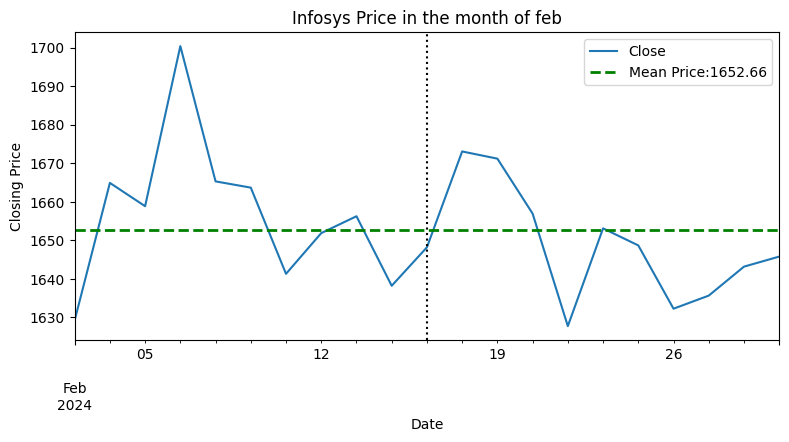

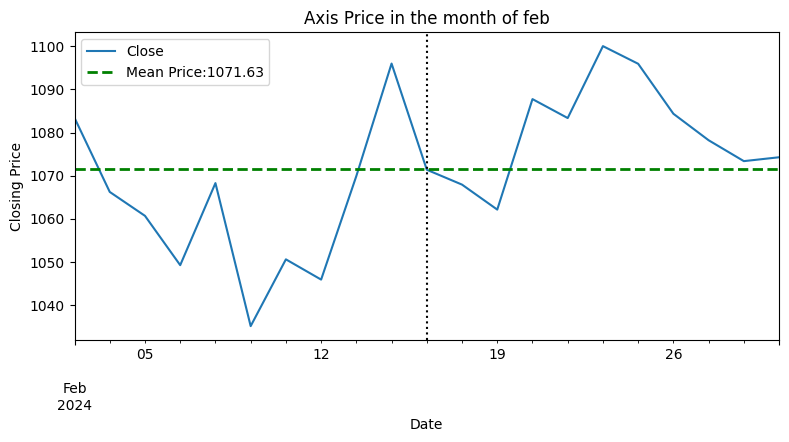

In [ ]:
# plotting a graph based on that
plt.figure(figsize = (20, 4))
plt.subplot(1,2,1)
last_month['Close'].plot(title="Infosys Price in the month of feb")
plt.xlabel("Date")
plt.ylabel("Closing Price")
mean_value = last_month['Close'].mean()
plt.axvline(pd.to_datetime('2024-02-15'), color='black', linestyle='dotted')
plt.axhline(mean_value, color='green', linestyle='dashed', linewidth=2 ,label=f"Mean Price:{mean_value:.2f}")
plt.legend()
plt.show()

# this is the graph for the infosys stock
plt.figure(figsize = (20, 4))
plt.subplot(1,2,2)
axis_lastmonth['Close'].plot(title="Axis Price in the month of feb")
plt.xlabel("Date")
plt.ylabel("Closing Price")
mean_value_axis = axis_lastmonth['Close'].mean()
plt.axvline(pd.to_datetime('2024-02-15'), color='black', linestyle='dotted')
plt.axhline(mean_value_axis, color='green', linestyle='dashed', linewidth=2 ,label=f"Mean Price:{mean_value_axis:.2f}")
plt.legend()
plt.show()


## the main difference between volatility and non volatility is that the stable and low fluctuation is there while in the non volatility area which we have done above the tendencey to increase in the risk is more as the amount of fluctuation is more




In [ ]:
# we can also add in a factor which is know as volatility whose basic principle is risk management
stock_data = []
for stock in nifty50_stocks:
    try:
        ticker = yf.Ticker(stock)
        info = ticker.info

        # Fetch historical data for last 6 months
        hist = ticker.history(period="6mo")["Close"]

        # Compute daily returns & annualized volatility (risk)
        daily_returns = hist.pct_change().dropna()
        volatility = np.std(daily_returns) * np.sqrt(252)  # Annualized Volatility

        stock_data.append({
            "Symbol": stock,
            "PE Ratio": info.get("trailingPE", None),
            "Market Cap": info.get("marketCap", None),
            "Avg Volume": info.get("averageVolume", None),
            "Volatility": volatility  # Risk measurement
        })
    except Exception as e:
        print(f"Error fetching data for {stock}: {e}")



ERROR:yfinance:$HDFC.NS: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")


In [ ]:
df = pd.DataFrame(stock_data)

pe_min, pe_max = 10, 30
market_cap_min = 500000000000
volume_min = 1000000
max_volatility = 0.25

# here we have taken the same ranges as that of the old one

In [ ]:

filtered_df_new = df[
    (df["PE Ratio"].between(pe_min, pe_max, inclusive="both")) &
    (df["Market Cap"] >= market_cap_min) &
    (df["Avg Volume"] >= volume_min) &
    (df["Volatility"] <= max_volatility)  # Low-risk filter
]

# Select random stocks from filtered ones
num_stocks = 5
selected_stocks = filtered_df.sample(min(num_stocks, len(filtered_df)))

# Display results
print("Filtered & Randomly Selected Low-Risk Stocks:")
print(selected_stocks)

Filtered & Randomly Selected Low-Risk Stocks:
          Symbol   PE Ratio    Market Cap  Avg Volume  Volatility
4   ICICIBANK.NS  19.644890  9.593597e+12  10559910.0    0.178436
11        ITC.NS  25.481665  5.130781e+12  15016586.0    0.208286
0    RELIANCE.NS  24.951105  1.726396e+13  11931494.0    0.209112
1         TCS.NS  26.802124  1.306510e+13   2378464.0    0.216328
14   AXISBANK.NS  12.162984  3.409617e+12   8791047.0    0.225202


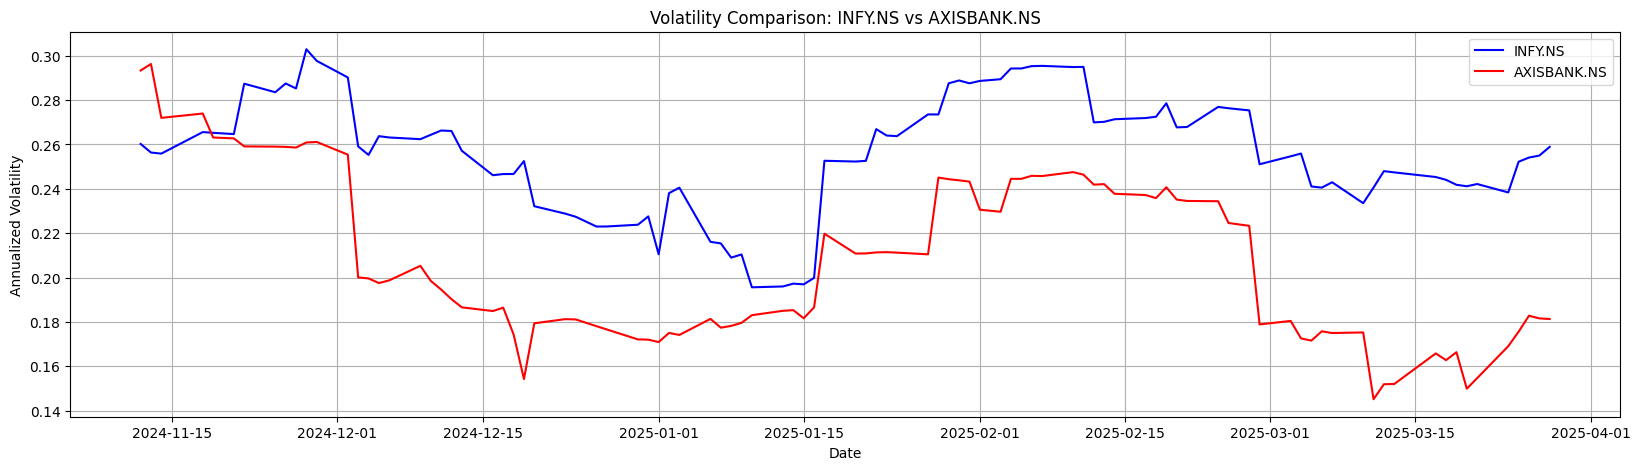

In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Define two stocks
stock1 = "INFY.NS"
stock2 = "AXISBANK.NS"

# Fetch historical prices (6 months)
data1 = yf.Ticker(stock1).history(period="6mo")["Close"]
data2 = yf.Ticker(stock2).history(period="6mo")["Close"]

# Compute daily returns
returns1 = data1.pct_change().dropna()
returns2 = data2.pct_change().dropna()
# what this does is that it drops the


rolling_volatility1 = returns1.rolling(window=30).std() * np.sqrt(252)
rolling_volatility2 = returns2.rolling(window=30).std() * np.sqrt(252)


plt.figure(figsize=(20, 5))
plt.plot(rolling_volatility1, label=stock1, color="blue")
plt.plot(rolling_volatility2, label=stock2, color="red")
plt.xlabel("Date")
plt.ylabel("Annualized Volatility")
plt.title("Volatility Comparison: {} vs {}".format(stock1, stock2))
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
reliance= yf.Ticker("RELIANCE.NS")
three_months = reliance.history(start="2025-01-01", end="2025-03-22")

last_month = reliance.history(start="2024-02-01", end="2024-03-01")






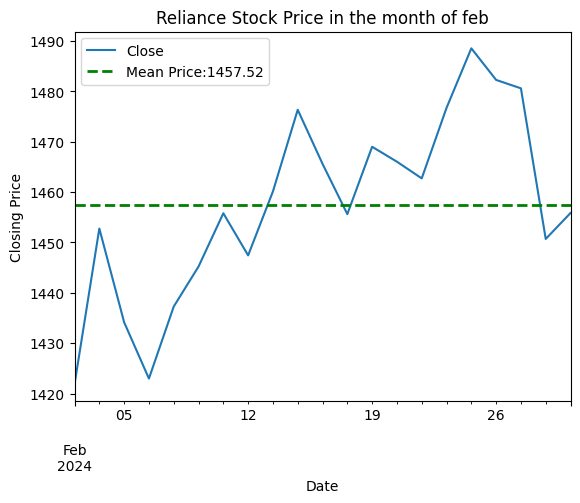

In [ ]:
last_month['Close'].plot(title="Reliance Stock Price in the month of feb")
plt.xlabel("Date")
plt.ylabel("Closing Price")
mean_value_reliance = last_month['Close'].mean()
plt.axhline(mean_value_reliance, color='green', linestyle='dashed', linewidth=2 ,label=f"Mean Price:{mean_value_reliance:.2f}")
plt.legend()
plt.show()




In [ ]:
axis= yf.Ticker("AXISBANK.NS")
three_months_axis= axis.history(start="2025-01-01", end="2025-03-2")



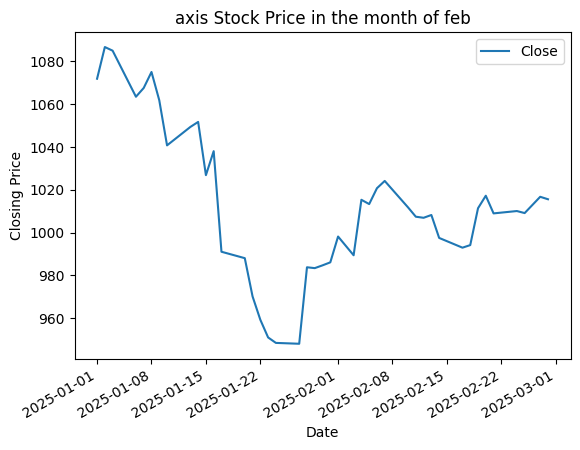

In [ ]:
three_months_axis['Close'].plot(title="axis Stock Price in the month of feb")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.show()